In [1]:
import requests
from bs4 import BeautifulSoup as BS
from IPython.core.display import HTML
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
URL = 'https://countrymusichalloffame.org/hall-of-fame/members/'

response = requests.get(URL)

In [3]:
response.status_code

200

In [4]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.e

In [5]:
soup = BS(response.text)
type(soup)

bs4.BeautifulSoup

In [6]:
artist = soup.find('h3')
type(soup.find('h3'))

bs4.element.Tag

In [7]:
artist

<h3>Roy Acuff</h3>

In [8]:
artists = soup.findAll('h3')
artists

[<h3>Roy Acuff</h3>,
 <h3>Alabama</h3>,
 <h3>Bill Anderson</h3>,
 <h3>Eddy Arnold</h3>,
 <h3>Chet Atkins</h3>,
 <h3>Gene Autry</h3>,
 <h3>DeFord Bailey</h3>,
 <h3>Bobby Bare</h3>,
 <h3>Eddie Bayers</h3>]

#### On to step 2!

In [9]:
inducted2 = soup.find(class_= 'vertical-cards-container').findAll('p')

In [10]:
inducted2=re.findall('\d{4}', str(inducted2))

#### On to step 3!

In [11]:
artists=pd.DataFrame(artists)
print(artists) #Just checking that it worked. It did.
inducted2=pd.DataFrame(inducted2)
print(inducted2)
#artist.reset_index(inplace=True)
#inducted2=reset_index(inplace=True)

               0
0      Roy Acuff
1        Alabama
2  Bill Anderson
3    Eddy Arnold
4    Chet Atkins
5     Gene Autry
6  DeFord Bailey
7     Bobby Bare
8   Eddie Bayers
      0
0  1962
1  2005
2  2001
3  1966
4  1973
5  1969
6  2005
7  2013
8  2022


In [12]:
inducted2.astype(object)

,0
0,1962
1,2005
2,2001
3,1966
4,1973
5,1969
6,2005
7,2013
8,2022


In [13]:
Country_Music=pd.merge(artists, inducted2, left_index=True, right_index=True)
Country_Music.rename(columns={'0_x':'Inductee', '0_y':'Year'})
print(Country_Music)

             0_x   0_y
0      Roy Acuff  1962
1        Alabama  2005
2  Bill Anderson  2001
3    Eddy Arnold  1966
4    Chet Atkins  1973
5     Gene Autry  1969
6  DeFord Bailey  2005
7     Bobby Bare  2013
8   Eddie Bayers  2022


### There are times in one's life, where they must move on to number 4, daunting as it may be.

In [14]:
page='https://countrymusichalloffame.org/hall-of-fame/members/page/2'
reponderance = requests.get(page)

In [15]:
reponderance.status_code

200

In [16]:
p_soup = BS(reponderance.text)
type(p_soup)

bs4.BeautifulSoup

In [17]:
winners = []
url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'

for page in range(1,18):
    pagedata = requests.get(url + str(page))
    soup2 = BS(pagedata.text)
    people = [person.text for person in soup2.findAll('h3')]
    winners.append(people)
print(winners)
#Mad props to Phil George, who made this work.

[['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Eddie Bayers'], ['Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown'], ['Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Ray Charles', 'Roy Clark', 'Cowboy Jack Clement'], ['Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers'], ['Jim Denny', 'Little Jimmy Dickens', 'Dean Dillon', 'Pete Drake', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley'], ['Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard'], ['Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 

In [18]:
times_of_our_lives = []
url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'

for page in range(1,18):
    pagedata = requests.get(url + str(page))
    soup2 = BS(pagedata.text)
    time = [Inducted.text for Inducted in soup2.find(class_= 'vertical-cards-container').findAll('p')]
    time=re.findall('\d{4}', str(time))
    times_of_our_lives.append(time)
print(times_of_our_lives)
#whoo hoo! With a little bit of manipulation it worked!

[['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '2022'], ['1999', '2011', '2006', '2019', '1974', '1987', '2012', '2019', '2015'], ['2015', '1991', '2005', '2002', '1970', '1980', '2022', '2009', '2013'], ['1973', '2014', '1976', '2003', '1981', '2016', '1972', '2010', '2001'], ['1966', '1983', '2021', '2022', '2007', '2001', '1985', '2004', '1967'], ['1990', '2016', '1967', '1982', '1980', '2001', '2007', '2018', '1994'], ['2008', '2008', '1966', '2001', '1982', '1997', '2010', '2017', '2006'], ['2001', '1992', '1978', '2001', '1974', '2004', '2001', '1997', '1979'], ['2001', '1988', '1966', '2009', '2015', '2009', '2011', '1995', '2014'], ['1970', '1996', '1998', '2001', '1993', '2015', '1996', '1999', '1975'], ['1984', '2001', '2001', '1998', '1992', '1996', '2000', '2017', '1967'], ['1964', '2012', '1982', '1961', '2013', '1988', '1961', '1986', '1971'], ['2017', '2011', '2010', '1967', '2018', '2003', '2012', '1979', '1980'], ['1989', '2019', '1989', '2008', '200

In [19]:
stars=pd.DataFrame(winners)
print(stars) #Just checking that it worked. It did.
induction=pd.DataFrame(times_of_our_lives)
print(induction)

                              0                            1  \
0                     Roy Acuff                      Alabama   
1                   Johnny Bond               Bobby Braddock   
2   Jim Ed Brown and the Browns  Boudleaux and Felice Bryant   
3                   Patsy Cline                 Hank Cochran   
4                     Jim Denny         Little Jimmy Dickens   
5          Tennessee Ernie Ford                  Fred Foster   
6                   Tom T. Hall               Emmylou Harris   
7               Waylon Jennings                 George Jones   
8           The Louvin Brothers                 Loretta Lynn   
9                   Bill Monroe                Patsy Montana   
10                   Ralph Peer                 Sam Phillips   
11                   Tex Ritter         Hargus “Pig” Robbins   
12                  Don Schlitz                 Jean Shepard   
13                   Jack Stapp                  Ray Stevens   
14                Hank Thompson         

### Well that was interesting and a bit more than I expected. It has pages by rows, but arbitrary columns?

In [20]:
stars.head(5)

,0,1,2,3,4,5,6,7,8
0,Roy Acuff,Alabama,Bill Anderson,Eddy Arnold,Chet Atkins,Gene Autry,DeFord Bailey,Bobby Bare,Eddie Bayers
1,Johnny Bond,Bobby Braddock,Harold Bradley,Jerry Bradley,Owen Bradley,Rod Brasfield,Garth Brooks,Brooks & Dunn,Jim Ed Brown
2,Jim Ed Brown and the Browns,Boudleaux and Felice Bryant,Glen Campbell,Bill Carlisle,Carter Family,Johnny Cash,Ray Charles,Roy Clark,Cowboy Jack Clement
3,Patsy Cline,Hank Cochran,Paul Cohen,Floyd Cramer,Vernon Dalhart,Charlie Daniels,Jimmie Davis,Jimmy Dean,Delmore Brothers
4,Jim Denny,Little Jimmy Dickens,Dean Dillon,Pete Drake,Ralph Emery,The Everly Brothers,Flatt And Scruggs,Jim Foglesong,Red Foley


In [21]:
Country_Music=pd.merge(stars, induction, left_index=True, right_index=True)
#Country_Music.rename(columns={'0_x':'Inductee', '0_y':'Year'})
print(Country_Music)

                            0_x                          1_x  \
0                     Roy Acuff                      Alabama   
1                   Johnny Bond               Bobby Braddock   
2   Jim Ed Brown and the Browns  Boudleaux and Felice Bryant   
3                   Patsy Cline                 Hank Cochran   
4                     Jim Denny         Little Jimmy Dickens   
5          Tennessee Ernie Ford                  Fred Foster   
6                   Tom T. Hall               Emmylou Harris   
7               Waylon Jennings                 George Jones   
8           The Louvin Brothers                 Loretta Lynn   
9                   Bill Monroe                Patsy Montana   
10                   Ralph Peer                 Sam Phillips   
11                   Tex Ritter         Hargus “Pig” Robbins   
12                  Don Schlitz                 Jean Shepard   
13                   Jack Stapp                  Ray Stevens   
14                Hank Thompson         

In [22]:
column_names=["0_x",'0_y','1_x','1_y','2_x','2_y','3_x','3_y', '4_x', '4_y', '5_x', '5_y', '6_x', '6_y', '7_x', '7_y', '8_x', '8_y']
Country_Music = Country_Music.reindex(columns=column_names)
Country_Music.head(5)
#got them in order. Huzzah!

,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,5_x,5_y,6_x,6_y,7_x,7_y,8_x,8_y
0,Roy Acuff,1962,Alabama,2005,Bill Anderson,2001,Eddy Arnold,1966,Chet Atkins,1973,Gene Autry,1969,DeFord Bailey,2005,Bobby Bare,2013,Eddie Bayers,2022
1,Johnny Bond,1999,Bobby Braddock,2011,Harold Bradley,2006,Jerry Bradley,2019,Owen Bradley,1974,Rod Brasfield,1987,Garth Brooks,2012,Brooks & Dunn,2019,Jim Ed Brown,2015
2,Jim Ed Brown and the Browns,2015,Boudleaux and Felice Bryant,1991,Glen Campbell,2005,Bill Carlisle,2002,Carter Family,1970,Johnny Cash,1980,Ray Charles,2022,Roy Clark,2009,Cowboy Jack Clement,2013
3,Patsy Cline,1973,Hank Cochran,2014,Paul Cohen,1976,Floyd Cramer,2003,Vernon Dalhart,1981,Charlie Daniels,2016,Jimmie Davis,1972,Jimmy Dean,2010,Delmore Brothers,2001
4,Jim Denny,1966,Little Jimmy Dickens,1983,Dean Dillon,2021,Pete Drake,2022,Ralph Emery,2007,The Everly Brothers,2001,Flatt And Scruggs,1985,Jim Foglesong,2004,Red Foley,1967


In [23]:
unraveled_winners = [person for sublist in winners for person in sublist]
print(unraveled_winners)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Eddie Bayers', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Ray Charles', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Dean Dillon', 'Pete Drake', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton',

In [24]:
induction1 = [i for sublist in times_of_our_lives for i in sublist]
print(induction1)
#Nope, couldn't be that easy

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '2022', '1999', '2011', '2006', '2019', '1974', '1987', '2012', '2019', '2015', '2015', '1991', '2005', '2002', '1970', '1980', '2022', '2009', '2013', '1973', '2014', '1976', '2003', '1981', '2016', '1972', '2010', '2001', '1966', '1983', '2021', '2022', '2007', '2001', '1985', '2004', '1967', '1990', '2016', '1967', '1982', '1980', '2001', '2007', '2018', '1994', '2008', '2008', '1966', '2001', '1982', '1997', '2010', '2017', '2006', '2001', '1992', '1978', '2001', '1974', '2004', '2001', '1997', '1979', '2001', '1988', '1966', '2009', '2015', '2009', '2011', '1995', '2014', '1970', '1996', '1998', '2001', '1993', '2015', '1996', '1999', '1975', '1984', '2001', '2001', '1998', '1992', '1996', '2000', '2017', '1967', '1964', '2012', '1982', '1961', '2013', '1988', '1961', '1986', '1971', '2017', '2011', '2010', '1967', '2018', '2003', '2012', '1979', '1980', '1989', '2019', '1989', '2008', '2006', '2021', '1986', '2022',

In [25]:
closer=pd.DataFrame(unraveled_winners)
closer.head()
warmer=pd.DataFrame(induction1)
warmer.head()

,0
0,1962
1,2005
2,2001
3,1966
4,1973


In [26]:
Hall_of_fame=pd.merge(closer, warmer, left_index=True, right_index=True)
Hall_of_fame

,0_x,0_y
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
142,Hank Williams Jr.,2021
143,Bob Wills,1968
144,Mac Wiseman,2014
145,Tammy Wynette,1998


### skip 5 and go to the bonus:

In [27]:
inductees=Hall_of_fame['0_y'].value_counts()
inductees

2001    12
1998     4
1966     4
2010     4
2015     4
2022     4
2008     4
1967     4
1961     3
2016     3
2021     3
2005     3
2018     3
1982     3
2009     3
1997     3
2017     3
1996     3
2014     3
2007     3
1980     3
2006     3
1989     3
2012     3
2013     3
1999     3
2019     3
2011     3
1973     2
1995     2
1988     2
1979     2
1984     2
1992     2
2000     2
1981     2
1970     2
2004     2
1974     2
1986     2
2002     2
2003     2
1976     2
1977     1
1965     1
1971     1
1975     1
1964     1
1962     1
1993     1
1978     1
1994     1
1990     1
1985     1
1983     1
1972     1
1991     1
1987     1
1969     1
1968     1
Name: 0_y, dtype: int64

In [28]:
Hall_of_fame.info()
new = Hall_of_fame["0_x"].str.split(" ", n = 1, expand = True)
  
# making separate first name column from new data frame
Hall_of_fame["First_Name"]= new[0]
  
# making separate last name column from new data frame
Hall_of_fame["Last_Name"]= new[1]
  
# Dropping old Name columns
Hall_of_fame.drop(columns =["0_x"], inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0_x     147 non-null    object
 1   0_y     147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [29]:
Hall_of_fame.head()

,0_y,First_Name,Last_Name
0,1962,Roy,Acuff
1,2005,Alabama,None
2,2001,Bill,Anderson
3,1966,Eddy,Arnold
4,1973,Chet,Atkins


In [30]:
most_names=Hall_of_fame.First_Name.value_counts()
most_names

Jim          5
Hank         5
The          5
Don          4
George       4
            ..
Lefty        1
Joseph       1
Tennessee    1
Red          1
Faron        1
Name: First_Name, Length: 109, dtype: int64

In [31]:
most_names.head(10)

Jim       5
Hank      5
The       5
Don       4
George    4
Roy       4
Ray       3
Johnny    3
Bill      3
Connie    2
Name: First_Name, dtype: int64

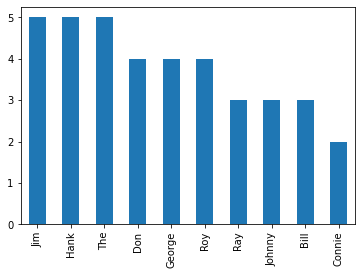

In [32]:
most_names.head(10).plot(kind='bar');

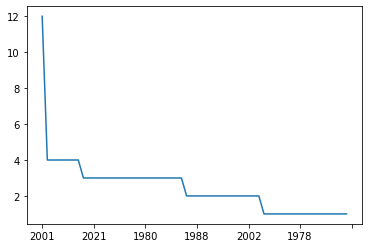

In [33]:
inductees.plot(kind='line');

### Bonus

If you navigate to Roy Acuff's page, you will see that his date of birth and date of death are listed towards the top of the page, along with his birthplace. Write some code that will extract these three values. Once you get it working for Roy Acuff, figure out how you can automatically extract these values across the whole dataset of artists. In doing this, you'll need to figure out a way to automatically determine the correct urls for each artist. Note also that not every artist will have these three values, so write your code in a way that it can handle cases where these values are missing. Alabama is one such example.

In [34]:
Eurl='https://countrymusichalloffame.org/artist/roy-acuff/'
risponce=requests.get(Eurl)
risponce.status_code
#Ok, so we're getting that much correct.

200

In [35]:
sloup=BS(risponce.text)
print(sloup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=

In [36]:
sloup.findAll('p')[4]

<p style="margin-top: 20px;color: #50565A;font-size: 14px;font-weight: 500;letter-spacing: 1.5px;line-height: 25px; text-transform: uppercase;">Birth: September 15, 1903 - Death: November 23, 1992 <br/> Birthplace: Maynardville, Tennessee </p>

In [37]:
closer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       147 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [38]:
closer.head()

,0
0,Roy Acuff
1,Alabama
2,Bill Anderson
3,Eddy Arnold
4,Chet Atkins


In [39]:
closer=closer.rename(columns={'0':'artist'})
closer.head()
#why doesn't this work? 
#Rob said address it before it becomes a dataframe

,0
0,Roy Acuff
1,Alabama
2,Bill Anderson
3,Eddy Arnold
4,Chet Atkins


In [40]:
chet={'Artist':unraveled_winners,'Year':induction1}
close=pd.DataFrame(chet)
close.head(2)
#looking better, need a dash in the names in lieu of a space

,Artist,Year
0,Roy Acuff,1962
1,Alabama,2005


In [41]:
close.Artist=[c.replace(' ', '-') for c in close.Artist]
close.head(2)

,Artist,Year
0,Roy-Acuff,1962
1,Alabama,2005


In [44]:
生=[]
死=[]
在=[]

for x in close.Artist:
    root = f'https://countrymusichalloffame.org/artist/{x}'
   # print(root) Everything worked up to this point
    response=requests.get(root)
    soupy =BS(response.text)
   # print(soupy.findAll('p')[4]) slowly making progress.
    good_soup=soupy.findAll('p')[4].text
    birth = re.findall(r"Birth:\s([A-Za-z]+\s\d+,\s\d{4})",good_soup) or ['NaN']
    dead = re.findall(r"Death:\s([A-Za-z]+\s\d+,\s\d{4})",good_soup) or ['NaN']
    where = re.findall(r"Birthplace:\s([A-Za-z]+\W\s[A-Za-z]+\s*[A-Za-z]+)",good_soup) or ['NaN']
    生.extend(birth) #.extend adds items onto a list as opposed to .append which creates a new list within a larger list.
    死.extend(dead)
    在.extend(where)
    
final_form= {'birth':生, "died":死, 'hometown':在}
final_form=pd.DataFrame(final_form)
final_form.head()
#     for p in soup.findAll(attrs={'style': "margin-top"}):


,birth,died,hometown
0,"September 15, 1903","November 23, 1992","Maynardville, Tennessee"
1,NaN,NaN,NaN
2,"November 1, 1937",NaN,"Columbia, South Carolina"
3,"May 15, 1918","May 8, 2008","Henderson, Tennessee"
4,"June 20, 1924","June 30, 2001","Luttrell, Tennessee"


In [43]:
website = 'https://subslikescript.com/movie/Titanic-120338'
result = requests.get(website)
content = result.text
soup = BeautifulSoup(content, 'lxml')
print(soup.prettify())

NameError: name 'BeautifulSoup' is not defined